# Kinematics of neutrons

From the kinematic point of view, neutrons are characterized by their momentum $\hbar {\bf k}$ and their energy $E$. In a direct geometry spectrometer, neutrons are emmited at the face of the moderator, and only those that have the energy in a very narrow range around some value $E_i$ (incident energy) can scatter from the sample. After scattering, the neutron energy is denoted by $E_f$ (final energy), and their final vavevector is ${\bf k}_f$. 

*Conventions*:
1. In the Mantid reference frame, the sample is at $(0,0,0)$, the incident beam is along $z$ direction $(0,0,1)$, and the vertical direction is $y$ $(0,1,0)$
2. The scattering angle (between ${\bf k}_f $ and ${\bf k}_i$) is called $\theta$, as seen in the figure below. $\theta$ varies between $0^\circ$ and $180^\circ$. The angle the projection of ${\bf k}_f$ in the $xy$ plane does with the $x$ axis is called $\phi$ ($-180^\circ$ to $180^\circ$).
3. We are interested in energy and wavevector transfers to the sample
    $$\Delta E = E_i -E_f=\frac{\hbar^2}{2m}(k_i^2-k_f^2)\\
    {\bf Q}={\bf k}_i-{\bf k}_f$$

In [1]:
from IPython.display import Image
Image(url= "../img/scattering_geometry.png")

We can write the magnitude of ${\bf Q}$ as $$Q^2=k_i^2+k_f^2-2 k_i k_f \cos\theta$$

We can now calculate the coverage of a direct geometry spectrometer (fixed $E_i$):
$$\frac{\Delta E}{E_i}=1-\left(\frac{k_f}{k_i}\right)^2\\
\frac{Q^2}{k_i^2}=1+\left(\frac{k_f}{k_i}\right)^2-2 \frac{k_i}{k_f} \cos\theta
$$

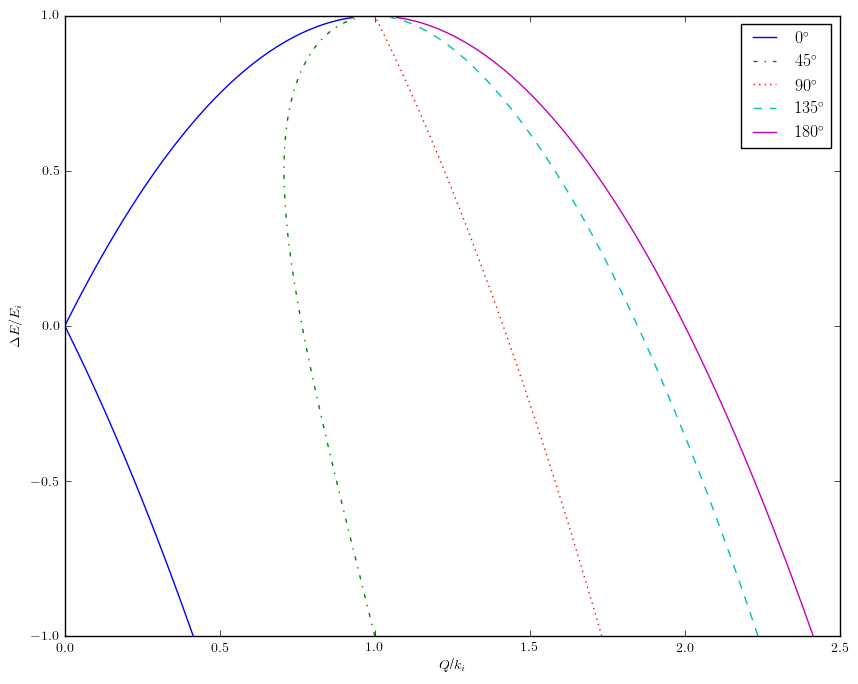

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

def Q_over_ki(DE_overEi,theta):
    """Calculate Q/k_i, given \DeltaE/E_i (number or numpy array) and \theta(in degrees)
    """
    kf_over_ki=np.sqrt(1-DE_overEi)
    return np.sqrt(2-DE_overEi-2.*kf_over_ki*np.cos(np.radians(theta)))

DE=np.arange(-1.,1.0,0.005)
fig, ax = plt.subplots(figsize=(10, 8), dpi= 150)
ax.plot(Q_over_ki(DE,0.),DE,'-',label='$0^\circ$')
ax.plot(Q_over_ki(DE,45.),DE,'-.',label='$45^\circ$')
ax.plot(Q_over_ki(DE,90.),DE,':',label='$90^\circ$')
ax.plot(Q_over_ki(DE,135.),DE,'--',label='$135^\circ$')
ax.plot(Q_over_ki(DE,180.),DE,'-',label='$180^\circ$')
ax.set_xlabel("$Q$/$k_i$")
ax.set_ylabel(r"$\Delta E/E_i$")
ax.legend() 


At energies used in neutron scattering experiments, the motion of the neutrons is non-relativistic.
$$E=\frac{m\cdot v^2}{2}=\frac{\hbar^2 k^2}{2 m}=\frac{h^2}{2 m \lambda^2}$$
The units usually used are mili-electronVolts for energy, Angstroms for wavelength, and inverse Angstrom for wavevector. The formula above can be rewritten for these units as:
$$E[{\rm meV}]=5.227\cdot10^{-6}(v[{\rm m/s}])^2=2.0717 (k[{\rm \mathring A^{-1}}])^2=\frac{81.79}{(\lambda[{\rm \mathring A}])^2}$$

In [3]:
import numpy as np

def E2V(energy):
    """
    Takes a neutron energy in meV and converts it to velocity in m/s 
    """
    return np.sqrt(energy/5.227e-6)

def V2E(velocity):
    """
    Takes a neutron velocity in m/s and converts it to energy in meV 
    """
    return velocity**2*5.227e-6


def E2K(energy):
    """
    Takes a neutron energy in meV and converts it to wavevector in inverse Angstroms 
    """
    return np.sqrt(energy/2.072)

def K2E(wavevector):
    """
    Takes a neutron wavevector in inverse Angstroms and converts it to energy in meV 
    """
    return wavevector**2*2.072

def E2lam(energy):
    """
    Takes a neutron energy in meV and converts it to wavelength in Angstroms 
    """
    return np.sqrt(81.81/energy)

def lam2E(lam):
    """
    Takes a neutron wavelength in Angstroms and converts it to energy in meV 
    """
    return 81.81/lam**2

print("Energy[meV] Velocity[m/s] Wavevector[\AA^-1] Wavelength[\AA]")
print('-'*60)
for e in [1.,10.,25.,100.,250.,1000.]:
    print("{0:10.1f} {1:13.2f} {2:13.2f} {3:13.2f}".format(e,E2V(e),E2K(e),E2lam(e)))

Energy[meV] Velocity[m/s] Wavevector[\AA^-1] Wavelength[\AA]
------------------------------------------------------------
       1.0        437.39          0.69          9.04
      10.0       1383.16          2.20          2.86
      25.0       2186.97          3.47          1.81
     100.0       4373.95          6.95          0.90
     250.0       6915.82         10.98          0.57
    1000.0      13831.64         21.97          0.29


# Direct geometry spectrometers: timing

The design and the operation of time of flight instruments is based on the knowledge or measurement of the time neutrons arrive at different points along their flightpath.
The basic components of a direct geometry spectrometer are shown in the figure below:

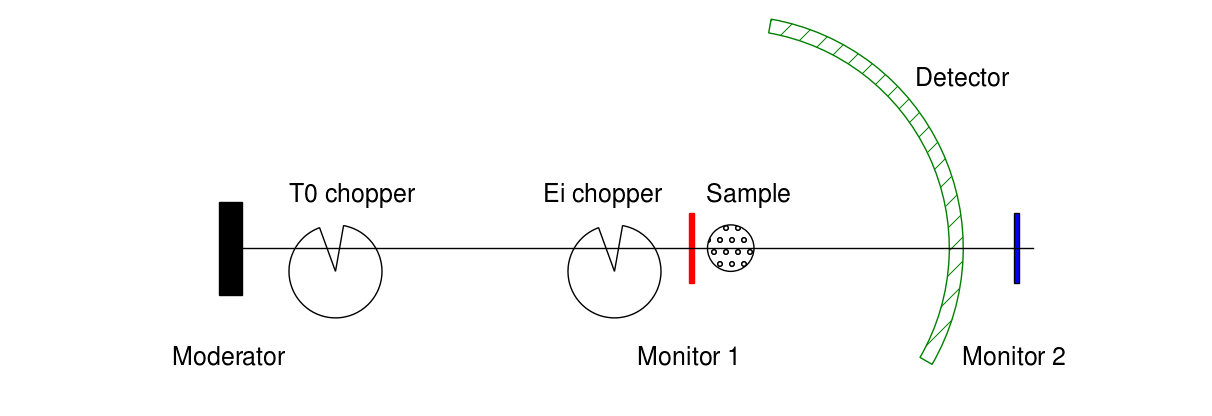

In [4]:
import matplotlib.patches as mp

fig, ax = plt.subplots(figsize=(15, 8), dpi= 150)
ax.plot([-10.5,6.5],[0,0],'k')

moderator_patch=mp.Polygon(zip(np.array([-11.,-10.5,-10.5,-11.,-11.]),np.array([-1,-1,1,1,-1])),color='k')
sample_patch=mp.Circle((0.,0.),0.5,fill=False,hatch='o')
detector_patch=mp.Wedge((0.,0.),5.,-30,80,width=0.3,fill=False,color='g',hatch='/')
chopper_T0_patch=mp.Wedge((-8.5,-0.5),1.,110,80,fill=False)
chopper_Ei_patch=mp.Wedge((-2.5,-0.5),1.,110,80,fill=False)
monitor1_patch=mp.Polygon(zip(np.array([-0.9,-0.8,-0.8,-0.9,-0.9]),np.array([-1,-1,1,1,-1])*0.75),color='r')
monitor2_patch=mp.Polygon(zip(np.array([-0.9,-0.8,-0.8,-0.9,-0.9])+7,np.array([-1,-1,1,1,-1])*0.75))

ax.add_patch(moderator_patch)
ax.text(-12,-2.5,'Moderator',fontsize=18)
ax.add_patch(chopper_T0_patch)
ax.text(-9.5,1.,'T0 chopper',fontsize=18)
ax.add_patch(chopper_Ei_patch)
ax.text(-4,1.,'Ei chopper',fontsize=18)
ax.add_patch(monitor1_patch)
ax.text(-2,-2.5,'Monitor 1',fontsize=18)
ax.add_patch(sample_patch)
ax.text(-0.5,1.,'Sample',fontsize=18)
ax.add_patch(detector_patch)
ax.text(4,3.5,'Detector',fontsize=18)
ax.add_patch(monitor2_patch)
ax.text(5,-2.5,'Monitor 2',fontsize=18)

ax.set_xlim([-15,15])
ax.set_ylim([-5,5])
ax.axis('scaled')
ax.set_axis_off()

Neutrons are emmited at regular intervals: 16666 $\mu$s atSNS, where source frequency is 60Hz, or 20000 $\mu$s at ISIS (source frequency is 50 Hz). 
In a very narrow time range after the protons hit the target, a lot of high energy neutrons and gamma rays are produced. The role of the moderator is to slow down these neutrons. The amount of time to moderate neutrons is on the order of 10-100$\mu$s.

Many neutrons that are not moderated will have a high energy, so they go through the moderator almost instantaneously. Also, a large quantity of gamma rays is present in a very short time interval after the protons hit the target. To eliminate this sources of radiation, as not to impact the measurements, a so called `T0 chopper` is inserted in the neutron beam, close to the moderator. It blocks fast neutrons and gamma rays, but let slower neutrons go through. If the proton beam hits the target at $t=0$, the T0 chopper is closed at that time.

The role of the `Ei chopper` is to monochromate the beam. In the polychromatic (white) beam, we have faster neutrons, that will arrive earlier to the Ei chopper, and slower neutrons, that will arrive later. If we know the distance from the moderator to the Ei chopper, one can calculate the time that corresponds to a certain incident neutron energy $E_i$. The energy resolution of the incident beam is given by the time the Ei chopper is open. Higher speeds mean better monochromation. But it can also lead to multiple energies going through the chopper (whenever it is open during the time frame it will allow certain energy neutrons to go through). The Ei chopper can also allow through very slow neutrons, those that arrive from previous pulses. 

To acurately get the incident energy, and to account for the time delay between the pulse hitting the target and the neutrons leaving the moderator, one can measure the times that neutrons arrive at two different points along the beam (`Monitor 1` and `Monitor 2` in the figure).Most of the neutrons arriving at Monitor 2 are not scattered by the sample. If neutrons arrive at Monitor 1, situated at distance $z_{M1}$ at time $t_{M1}$, and at Monitor 2 ($z_{M2}$) at $t_{M2}$, the velocity of the neutrons is given by: 
$$v_i=\frac{z_{M2}-z_{M1}}{t_{M2}-t_{M1}}$$
The neutrons leave the face of the moderator ($z_{Mod}$) at $$t_0=t_{M1}-\frac{z_{M1}-z_{Mod}}{v_i}$$

In Mantid one can use `GetEi` algorithm to perform this calculation:

In [5]:
import sys
sys.path.append('/home/3y9/Mantid/Build/bin')
from mantid.simpleapi import *
#load monitors (from a run with a nominal Ei=80meV)
monitors=LoadNexusMonitors(Filename='/SNS/ARCS/IPTS-16644/0/86600/NeXus/ARCS_86600_event.nxs')
Ei, tM1, spM1, t0 = GetEi(InputWorkspace=monitors) #spM1 is the spectrum number corresponding to Monitor1
print 'Ei = {0:.2f} meV'.format(Ei)
print 't0 = {0:.2f} meV'.format(t0)


Ei = 78.19 meV
t0 = 16.26 meV


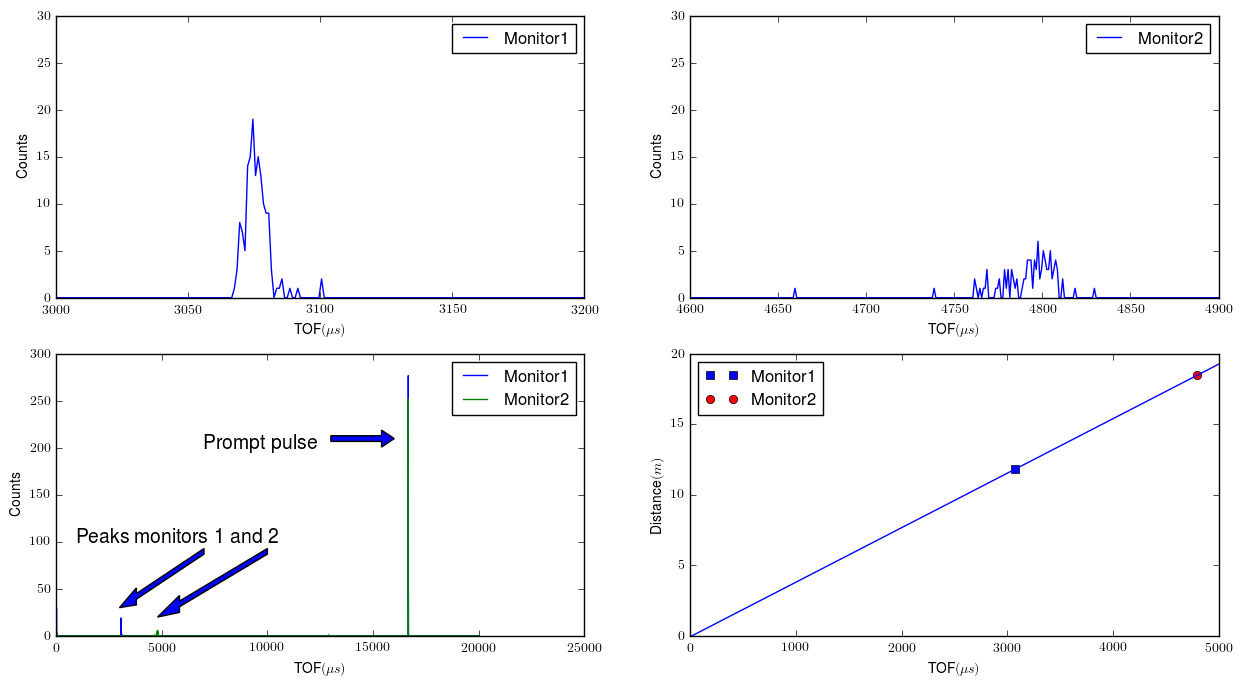

In [6]:
fig, ax = plt.subplots(2,2,figsize=(15, 8), dpi= 150)
tofs=(monitors.readX(0)[1:]+monitors.readX(0)[:-1])/2.
ax[0,0].plot(tofs,monitors.readY(0),label='Monitor1')
ax[0,0].set_xlim([3000.,3200.])
ax[0,0].set_ylim([0.,30.])
ax[0,0].set_xlabel("TOF$(\mu s)$")
ax[0,0].set_ylabel("Counts")
ax[0,0].legend() 
ax[0,1].plot(tofs,monitors.readY(1),label='Monitor2')
ax[0,1].set_xlim([4600.,4900.])
ax[0,1].set_ylim([0.,30.])
ax[0,1].set_xlabel("TOF$(\mu s)$")
ax[0,1].set_ylabel("Counts")
ax[0,1].legend() 
ax[1,0].plot(tofs,monitors.readY(0),label='Monitor1')
ax[1,0].plot(tofs,monitors.readY(1),label='Monitor2')
ax[1,0].legend() 
ax[1,0].text(1000,100.,'Peaks monitors 1 and 2',fontsize=14)
ax[1,0].text(7000,200.,'Prompt pulse',fontsize=14)
ax[1,0].add_patch(mp.Arrow(7000,90,-4000,-60,width=30))
ax[1,0].add_patch(mp.Arrow(10000,90,-5200,-70,width=30))
ax[1,0].add_patch(mp.Arrow(13000,210,3000,0,width=30))
ax[1,0].set_xlabel("TOF$(\mu s)$")
ax[1,0].set_ylabel("Counts")
ax[1,1].plot([3075.],[monitors.getDetector(0).getDistance(monitors.getInstrument().getSource())],'bs',label='Monitor1')
ax[1,1].plot([4800.],[monitors.getDetector(1).getDistance(monitors.getInstrument().getSource())],'ro',label='Monitor2')
ax[1,1].set_xlim([0.,5000.])
ax[1,1].set_ylim([0.,20.])

def tof_pos(position,velocity):
    return (position/velocity)*1e6 #time in microseconds not seconds

ax[1,1].plot([t0,t0+tof_pos(20.,E2V(Ei))],[0.,20])
ax[1,1].set_xlabel("TOF$(\mu s)$")
ax[1,1].set_ylabel("Distance$(m)$")
ax[1,1].legend(loc=2) 

For some instruments (CNCS or HYSPEC at SNS), there are not enough good monitors to determine the incident energy (the monitor position is not known accurately, or some are located before the monochromating chopper, or the electronics/calibration is bad). For these instruments, instrument scientists calibrated their instruments so that the incident energy is equal to the energy request. The also provided formulas to calculate the $t_0$ offset. You can find this formula in the instrument parameter file.

```
<!-- formula for t0 calculation. See http://muparser.sourceforge.net/mup_features.html#idDef2 for available operators-->
<parameter name="t0_formula" type="string">
   <!--<value val="198.2 * (1.0 + incidentEnergy)^(-0.84098)" /> Old formula (valid till august 2015) -->
   <value val="157.539+ln(incidentEnergy)*(-33.04593+ln(incidentEnergy)*(-8.07523+ln(incidentEnergy)*(2.2143-0.109521767* ln(incidentEnergy))))"/>
</parameter>
```

The `GetEi` algorithm knows how to interpret the formula, and will give the coorect answer. All it needs is a workspace that has the correct instrument, and a log value for `EnergyRequest`. The workspace does not even need to be a monitor workspace.

In [7]:
w=Load('CNCS_7860')
print GetEi(w)

(3.0, 0.0, 0, 61.77080180287334)


Sometimes `GetEi` algorithm fails

In [8]:
monitors_ARCS=LoadNexusMonitors('/SNS/ARCS/IPTS-14482/data/ARCS_66685_event.nxs')
print GetEi(monitors_ARCS)

ValueError: No peak found for the monitor with spectra num: 1 (at 11.831  metres from source).


When we plot the spectra in the two monitors in this file, we note that a white beam was used instead of a monochromatic one

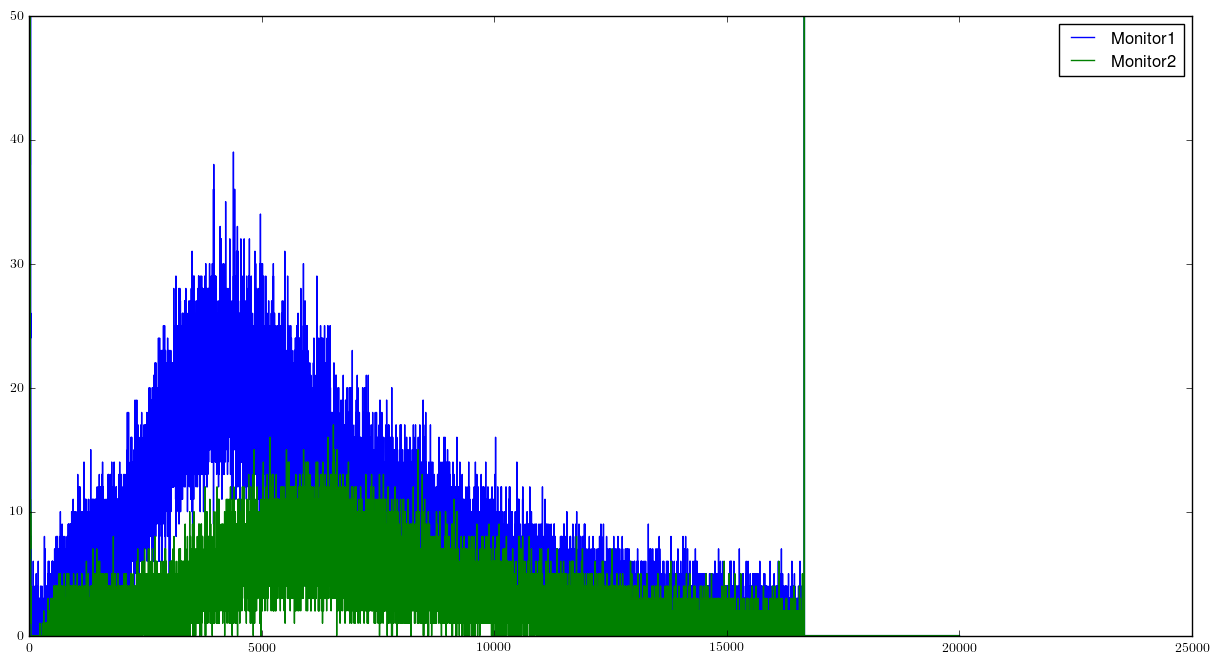

In [9]:
fig, ax = plt.subplots(figsize=(15, 8), dpi= 150)
tofs=(monitors_ARCS.readX(0)[1:]+monitors_ARCS.readX(0)[:-1])/2.
ax.plot(tofs,monitors_ARCS.readY(0),label='Monitor1')
ax.plot(tofs,monitors_ARCS.readY(1),label='Monitor2')
ax.set_ylim([0.,50.])
ax.legend()

`GetEi` might fail on a different reason on SEQUOIA

In [10]:
monitors_SEQ=LoadNexusMonitors('/SNS/SEQ/IPTS-10607/nexus/SEQ_113829.nxs.h5')
print GetEi(monitors_SEQ)

ValueError: No peak found for the monitor with spectra num: 1 (at 18.233319999999999  metres from source).


If one would try to plot these monitors, one would nottice that it's not possible. The monitors on `SEQUOIA` are event mode monitors. In Mantid, each event workspace has a histogram representation. But, by default, they contain only one bin, from the minimum time of flight to the maximum time of flight

In [11]:
print monitors_SEQ.readX(0)

[ -1.99999988e-01   1.66670996e+04]


One wold need to rebin the data, say with a step of 1 microsecond

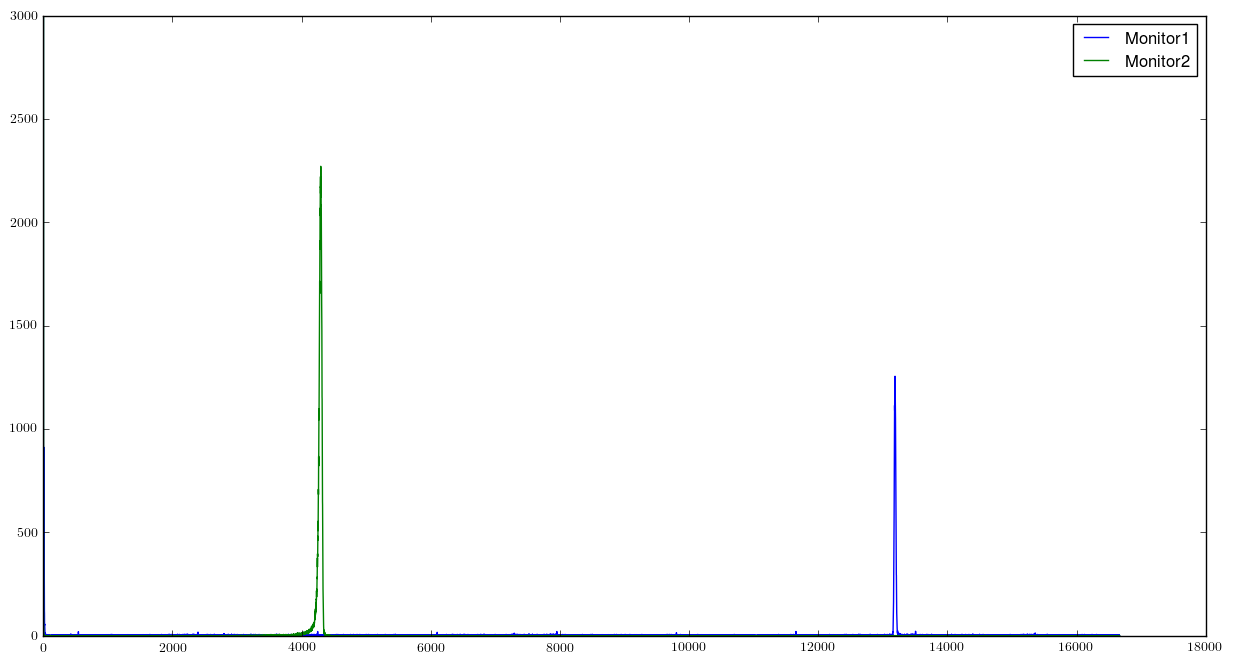

In [12]:
monitors_SEQ_rebin=Rebin(monitors_SEQ,Params="1",PreserveEvents=True)
fig, ax = plt.subplots(figsize=(15, 8), dpi= 150)
tofs=(monitors_SEQ_rebin.readX(0)[1:]+monitors_SEQ_rebin.readX(0)[:-1])/2.
ax.plot(tofs,monitors_SEQ_rebin.readY(0),label='Monitor1')
ax.plot(tofs,monitors_SEQ_rebin.readY(1),label='Monitor2')
ax.set_ylim([0.,3000.])
ax.legend()

You might notice that the peak in monitor 1 occurs after the peak in monitor 2. That is happening because the incident energy is so low that the time of flight to the second monitor is larger than the time between pulses (16666.6 microseconds). The data acquisition system does not this into consideration. One would need to add 1e6/60 microseconds to the spectra for second monitor. The `GetEiT0atSNS` does the shifting and rebinning automatically, before calling `GetEi`

In [13]:
Ei, t0 = GetEiT0atSNS(monitors_SEQ)
print 'Ei = {0:.2f} meV'.format(Ei)
print 't0 = {0:.2f} meV'.format(t0)
#get monitor distances from the source
d_m1 = monitors_SEQ.getDetector(0).getDistance(monitors_SEQ.getInstrument().getSource())
d_m2 = monitors_SEQ.getDetector(1).getDistance(monitors_SEQ.getInstrument().getSource())
print 'Expected TOF Monitor1: {0:.2f} microseconds'.format(t0+1e6*d_m1/E2V(Ei))
print 'Expected TOF Monitor2: {0:.2f} microseconds'.format(t0+1e6*d_m2/E2V(Ei))
print 'Expected TOF Monitor2 translated into the first frame: {0:.2f} microseconds'.format(t0+1e6*d_m2/E2V(Ei)-1e6/60.)

Ei = 10.05 meV
t0 = 42.10 meV
Expected TOF Monitor1: 13189.56 microseconds
Expected TOF Monitor2: 20955.41 microseconds
Expected TOF Monitor2 translated into the first frame: 4288.74 microseconds


In order to better understand how different components of the instrument work, we are going to introduce timing diagrams. These are simple representations of positions of different instrument parts and the time of flight (TOF) when the neutrons arrive at those components.

Let's create a fictional isntrument, with the following parameters:
* `Moderator` at 20 m before the sample
* `T0 chopper` at 15 m from the sample, 5 m from the moderator
* `Fermi chopper` at 2 m from the sample, 18 m from the moderator
* `Monitor1` at 18.5 m from the moderator, 1.5 m before the sample
* `Monitor1` at 30 m from the moderator, 10 m after the sample
* `Detector` at 5m after the sample, 25 m after the moderator
* `Sample` 20 m after the moderator

The incident energy that we use is 30 meV. For simplicity, we assume that $t_0$=0. A simple timing diagram can be created with the following script:


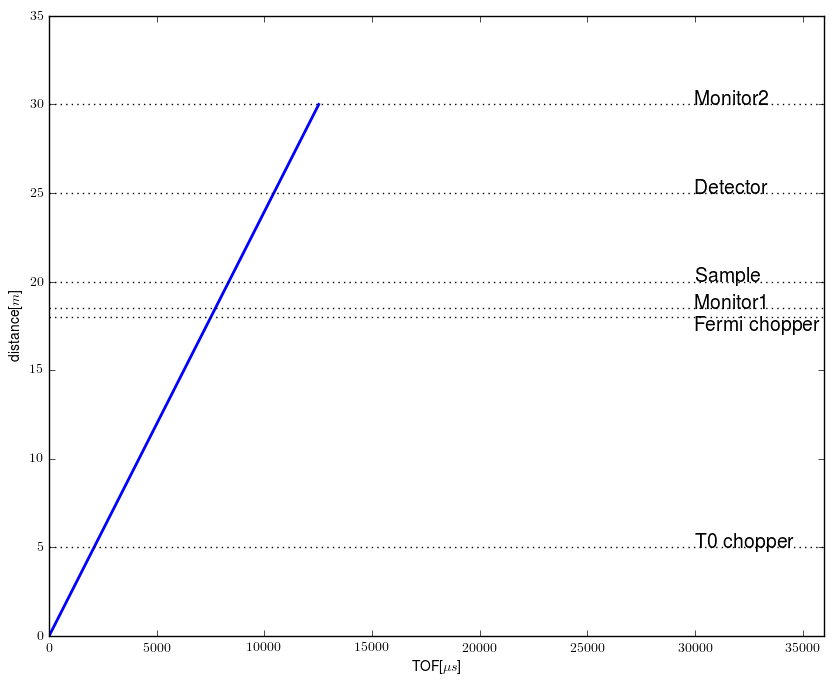

In [35]:
d_mod=0.
d_t0=5.
d_fc=18.
d_m1=18.5
d_m2=30.
d_det=25.
d_samp=20.

Ei=30.
vi=E2V(Ei)

tof_m2=1e6*d_m2/vi #in microseconds

fig, ax = plt.subplots(figsize=(10, 8), dpi= 150)
ax.plot([0,tof_m2],[0,d_m2],linewidth=2)
ax.plot([0,36000],[d_m1,d_m1],'k:')
ax.plot([0,36000],[d_m2,d_m2],'k:')
ax.plot([0,36000],[d_samp,d_samp],'k:')
ax.plot([0,36000],[d_det,d_det],'k:')
ax.plot([0,36000],[d_t0,d_t0],'k:')
ax.plot([0,36000],[d_fc,d_fc],'k:')
ax.set_ylim([0.,35])
ax.set_xlim([0,36000])
ax.text(30000,d_t0,'T0 chopper',fontsize=14)
ax.text(30000,d_m1,'Monitor1',fontsize=14)
ax.text(30000,d_m2,'Monitor2',fontsize=14)
ax.text(30000,d_samp,'Sample',fontsize=14)
ax.text(30000,d_det,'Detector',fontsize=14)
ax.text(30000,d_fc,'Fermi chopper',fontsize=14,verticalalignment='top')
ax.set_xlabel('TOF[$\mu s$]')
ax.set_ylabel('distance[$m$]')

The line above shows where is the neutron as a function of time of flight. The slope of the line is the velocity of the neutrons. There is only one neutron pulse, and, since the slope of the line did not change, the neutrons scattered elastically from the sample.

Let's plot some inelastic scattering, with $\Delta E=\pm$20 meV. The final energy of the neutrons for energy gain side is going to be 50 meV, and 10 meV for the energy loss side.

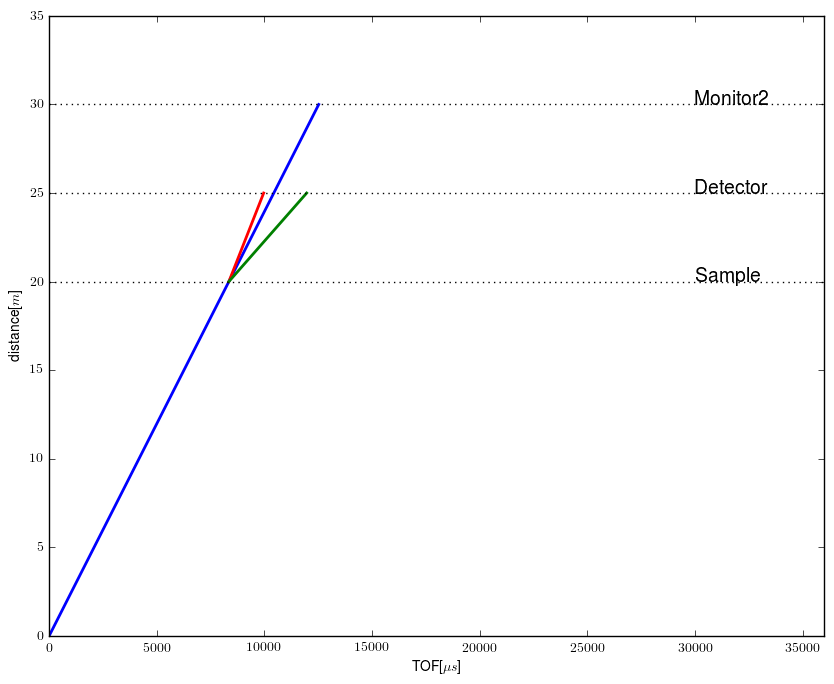

In [39]:
d_m2=30.
d_det=25.
d_samp=20.

Ei=30.
vi=E2V(Ei)

tof_m2=1e6*d_m2/vi #in microseconds
tof_samp=1e6*d_samp/vi #in microseconds

Ef1=50.
vf1=E2V(Ef1)
tof_det1=tof_samp+1e6*(d_det-d_samp)/vf1

Ef2=10.
vf2=E2V(Ef2)
tof_det2=tof_samp+1e6*(d_det-d_samp)/vf2

fig, ax = plt.subplots(figsize=(10, 8), dpi= 150)
ax.plot([0,tof_m2],[0,d_m2],linewidth=2)
ax.plot([tof_samp,tof_det1],[d_samp,d_det],'r',linewidth=2)
ax.plot([tof_samp,tof_det2],[d_samp,d_det],'g',linewidth=2)
ax.plot([0,36000],[d_m2,d_m2],'k:')
ax.plot([0,36000],[d_samp,d_samp],'k:')
ax.plot([0,36000],[d_det,d_det],'k:')
ax.set_ylim([0.,35])
ax.set_xlim([0,36000])
ax.text(30000,d_m2,'Monitor2',fontsize=14)
ax.text(30000,d_samp,'Sample',fontsize=14)
ax.text(30000,d_det,'Detector',fontsize=14)
ax.set_xlabel('TOF[$\mu s$]')
ax.set_ylabel('distance[$m$]')